In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches

In [2]:
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["axes.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["figure.figsize"] = [16., 6.]

In [3]:

df = pd.read_csv('battles.csv')
character_predictions = pd.read_csv("character-predictions.csv")


In [4]:
df.loc[:, "sum_defender"] = (4 - df[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
df.loc[:, "sum_attacker"] = (4 - df[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))
df.loc[:, "sum_attacker_commander"] = [len(x) if type(x) == list else np.nan for x in df.attacker_commander.str.split(",")]
df.loc[:, "sum_defender_commander"] = [len(x) if type(x) == list else np.nan for x in df.defender_commander.str.split(",")]
character_predictions.loc[:, "no_of_books"] = character_predictions[[x for x in character_predictions.columns if x.startswith("book")]].sum(axis = 1)

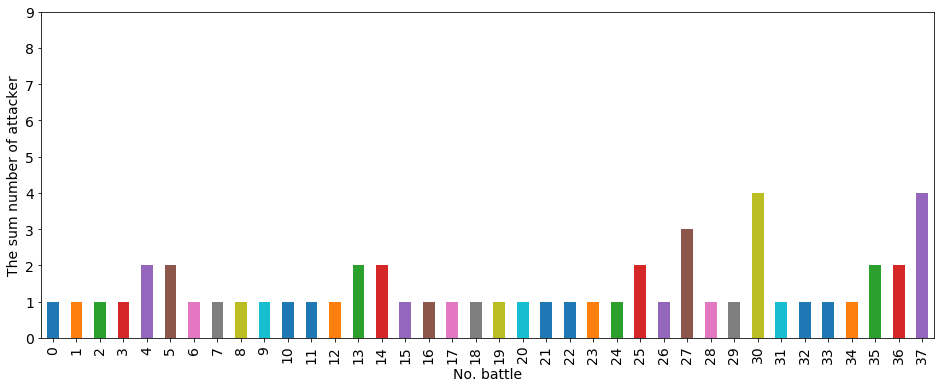

In [5]:
p=df.loc[:, "sum_attacker"]
q= p.plot.bar().set(xlabel = "No. battle", ylabel = "The sum number of attacker", ylim = (0, 9))

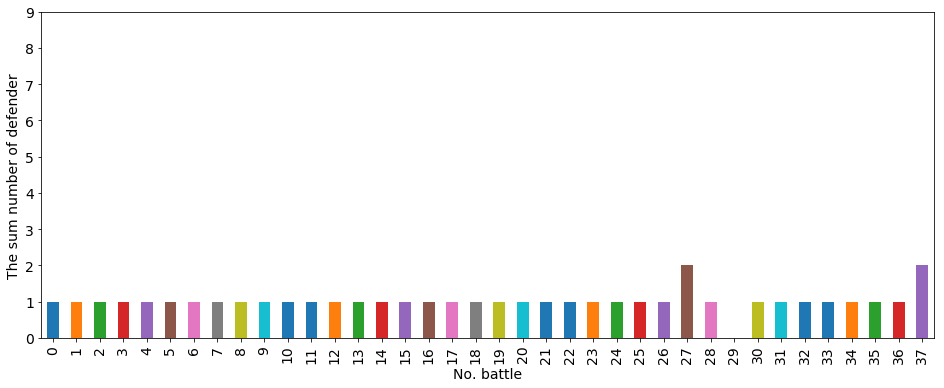

In [6]:
p=df.loc[:, "sum_defender"]
q= p.plot.bar().set(xlabel = "No. battle", ylabel = "The sum number of defender", ylim = (0, 9))

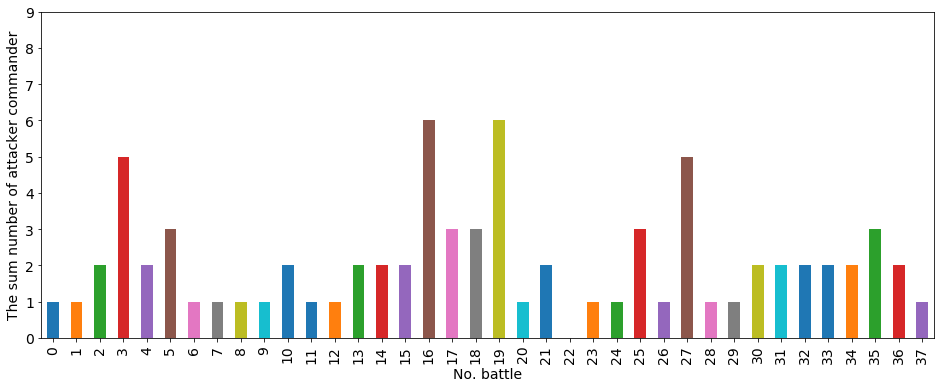

In [7]:
p=df.loc[:, "sum_attacker_commander"]
q= p.plot.bar().set(xlabel = "No. battle", ylabel = "The sum number of attacker commander", ylim = (0, 9))

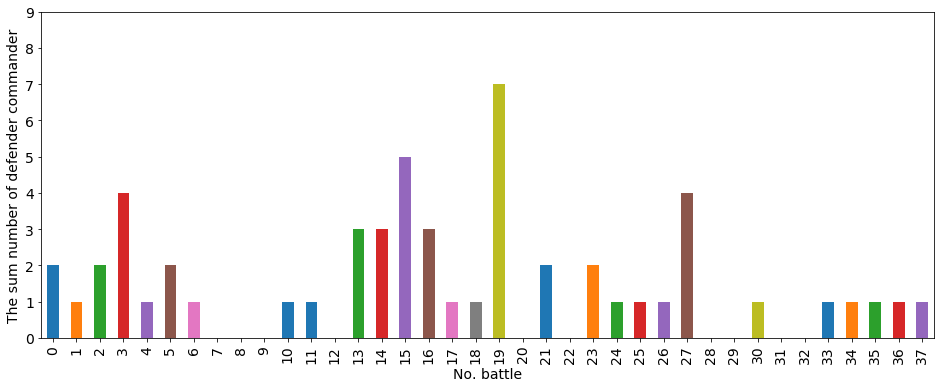

In [8]:
p=df.loc[:, "sum_defender_commander"]
q= p.plot.bar().set(xlabel = "No. battle", ylabel = "The sum number of defender commander", ylim = (0, 9))

   # Part 1: Analysis of the Battles


# 1. Major death/capture events by year

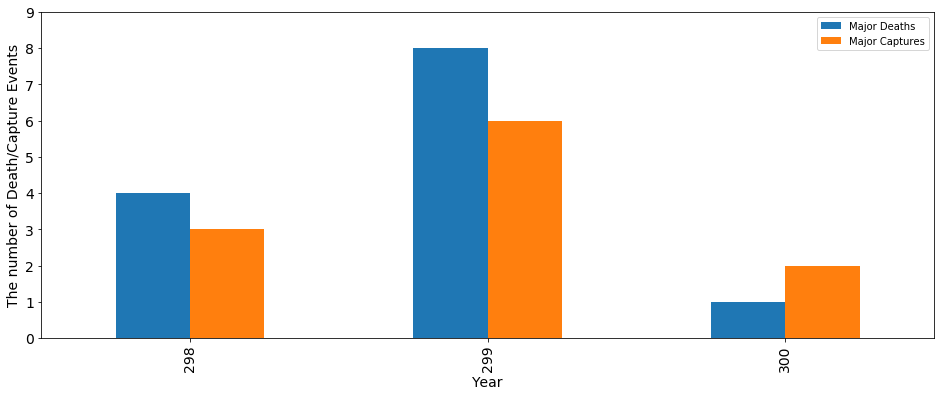

In [9]:
p = df.groupby('year').sum()[["major_death", "major_capture"]].plot.bar()

q= p.set(xlabel = "Year", ylabel = "The number of Death/Capture Events", ylim = (0, 9)), p.legend(["Major Deaths", "Major Captures"])



# 2. Which region had the most battles?

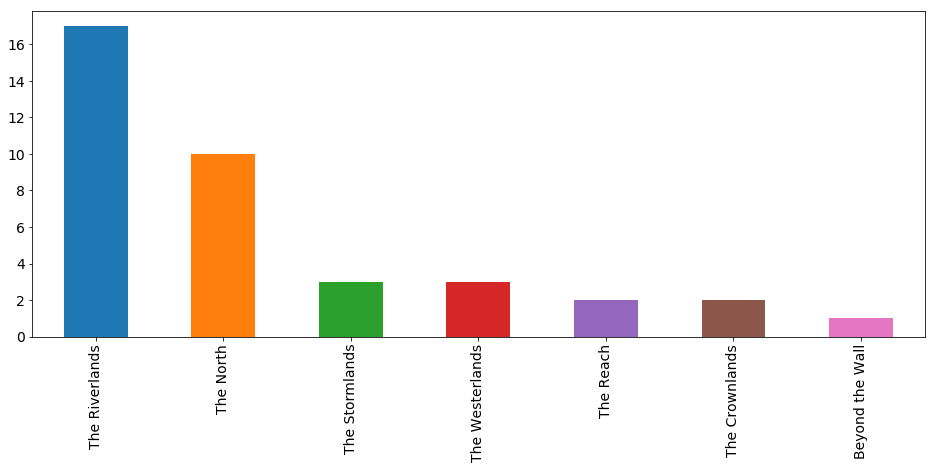

In [10]:
# Count the number of observations for each value, then make a bar plot
df['region'].value_counts().plot(kind='bar')

#  How many major death/capture events occur in each region?

/Users/yitongliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


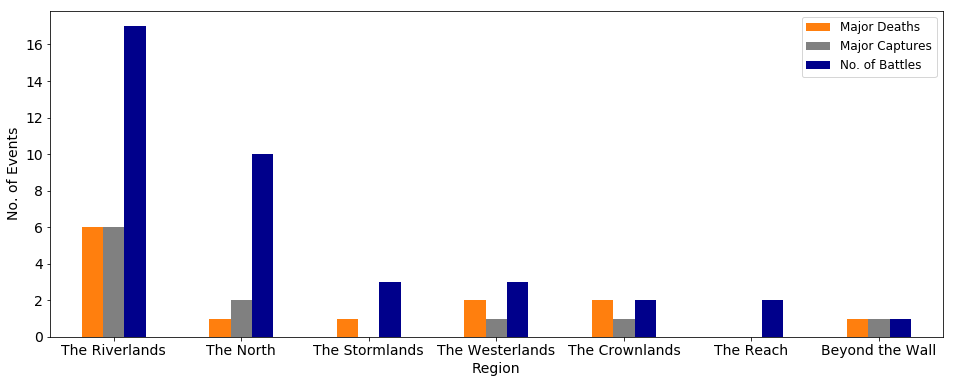

In [11]:
data = df.groupby("region").sum()[["major_death", "major_capture"]]
p = pd.concat([data, df.region.value_counts().to_frame()], axis = 1).sort_values("region", ascending = False).copy(deep = True).plot.bar(color = [sns.color_palette()[1], "grey", "darkblue"], rot = 0)
_ = p.set(xlabel = "Region", ylabel = "No. of Events"), p.legend(["Major Deaths", "Major Captures", "No. of Battles"], fontsize = 12.)

# 3. How common was the different types of battles?

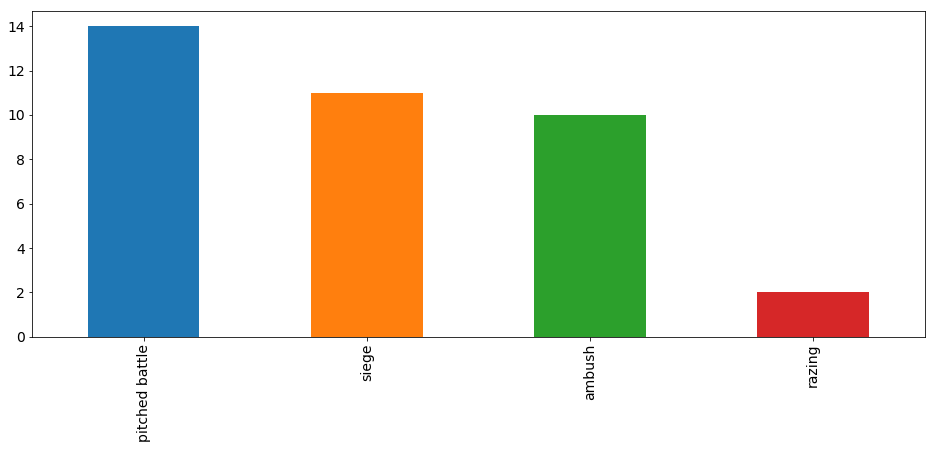

In [12]:
# Count the number of observations for each value, then make a bar plot
df['battle_type'].value_counts().plot(kind='bar')

# 4. Which king attacked the most?

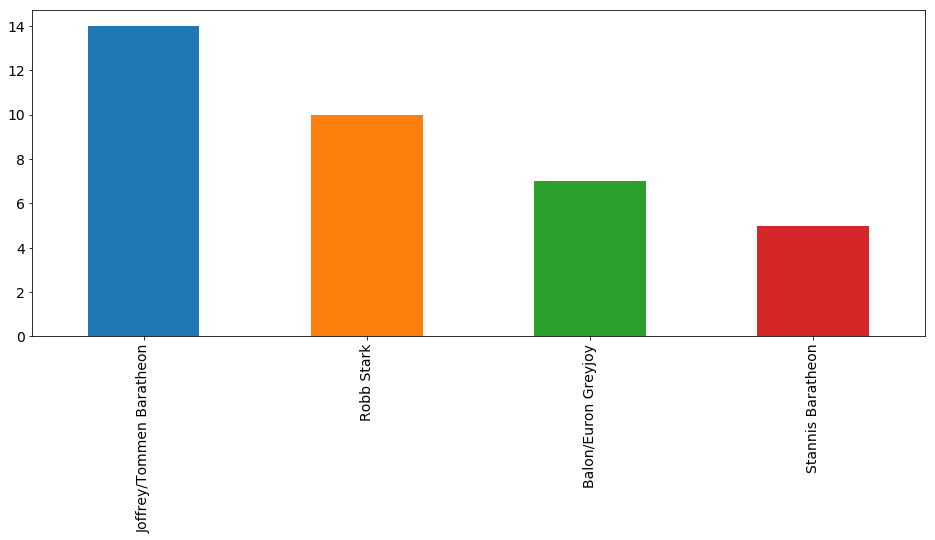

In [13]:
# Count the number of observations for each value, then make a bar plot
df['attacker_king'].value_counts().plot(kind='bar')

# 5. Which king was the most attacked?

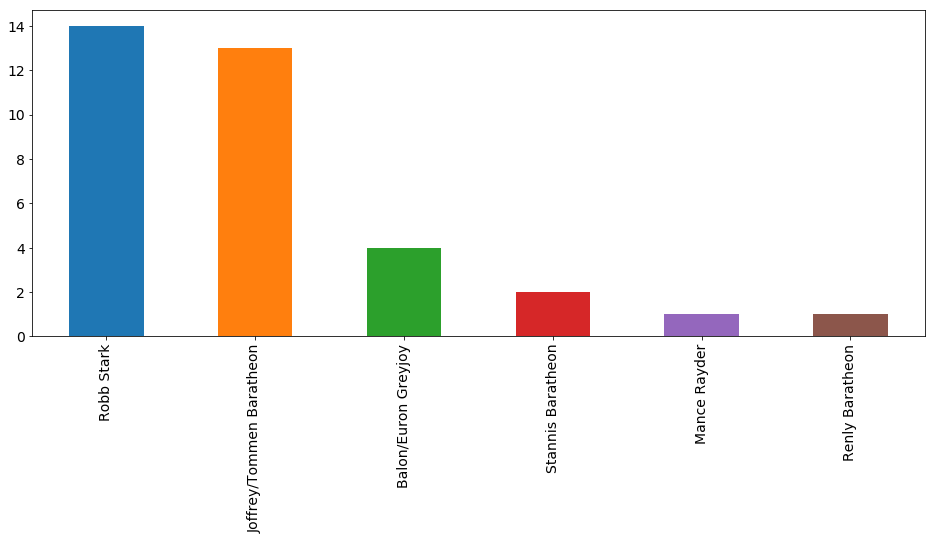

In [14]:
df['defender_king'].value_counts().plot(kind='bar')

6

. Is there any relationship between troop size and battle outcome?

# 7. Who is the Greatest Commander in the War of Five Kings?

In [15]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
# Create a list of attacking commanders
attacker_list = []
# For each row in df.attacker_commander,
for row in df['attacker_commander']:
    # if the cell is a string,
    if type(row) == str:
        # split up the names by the comma, 
        #and attach it to attacker commander list,
       attacker_list.append(row.split(','))
    # otherwise,     
    else:
        # do nothing
        continue

# Create a list of defending commanders
defender_list = []
        
# For each row in df.defender_commander,
for row in df['defender_commander']:
    # if the cell is a string,
    if type(row) == str:
        # split up the names by the comma, 
        #and attach it to defender commander list,
       defender_list.append(row.split(','))
    # otherwise
    else:
        # do nothing
        defender_list.append('')

In [16]:
# Create a list of commanders
commander = []

# For each list in attacker_list,
for row in attacker_list:
    # and each list in that list
    for element in row:
        # strip of any leading blank space 
        # and append it to the commander list
        commander.append(element.lstrip())

# For each list in defender_list,
for row in defender_list:
    # and each list in that list
    for element in row:
        # strip of any leading blank space 
        # and append it to the commander list
        commander.append(element.lstrip())
commanders = list(set(commander))

In [17]:
#  Count the number of times a commander successfully attacked

# Create a list
attack_win = []

# for each commander:
for row in commanders:
    # create a score variable, then
    score = 0
    # go through each cell of attacker commander where the attacker wins:
    for x in df['attacker_commander'][df['attacker_outcome'] == 'win']:
        # if the cell is a string
        if type(x) == str:
            # and if the commander is in the cell
            if row in x:
                # add one to score
                score = score + 1
            # if not
            else:
                # add 0 to score
                score = score + 0
        # if the cell is not a string        
        else:
            # do nothing
            continue
    # append the score to the list
    attack_win.append(score)

In [18]:
#  Count the number of times a commander unsuccessfully attacked

# Create a list
attack_loss = []

# for each commander:
for row in commanders:
    # create a score variable
    score = 0
    # go through each cell of attacker commander where the attacker loses:
    for x in df['attacker_commander'][df['attacker_outcome'] == 'loss']:
        # if the cell is a string
        if type(x) == str:
            # and if the commander is in the cell
            if row in x:
                # add one to score
                score = score + 1
            # if not
            else:
                # add 0 to score
                score = score + 0
        # if the cell is not a string        
        else:
            # do nothing
            continue
    # append the score to the list
    attack_loss.append(score)

In [19]:
#  Count the number of times a commander successfully defended
# Create a list
defend_win = []

# for each commander:
for row in commanders:
    # create a score variable
    score = 0
    # go through each cell of defender commander where the attacker losses:
    for x in df['defender_commander'][df['attacker_outcome'] == 'loss']:
        # if the cell is a string
        if type(x) == str:
            # and if the commander is in the cell
            if row in x:
                # add one to score
                score = score + 1
            # if not
            else:
                # add 0 to score
                score = score + 0
        # if the cell is not a string        
        else:
            # do nothing
            continue   
    # append the score to the list
    defend_win.append(score)

In [20]:
#  Count the number of times a commander unsuccessfully defended

# Create a list
defend_loss = []
# for each commander:
for row in commanders:
    # create a score variable
    score = 0
    # go through each cell of defender commander where the attacker wins:
    for x in df['defender_commander'][df['attacker_outcome'] == 'win']:
        # if the cell is a string
        if type(x) == str:
            # and if the commander is in the cell
            if row in x:
                # add one to score
                score = score + 1
            # if not
            else:
                # add 0 to score
                score = score + 0
        # if the cell is not a string        
        else:
            # do nothing
            continue
    # append the score to the list
    defend_loss.append(score)

In [21]:

columns = {'attack_win':  attack_win, 
           'attack_loss': attack_loss,
           'defend_win': defend_win,
           'defend_loss': attack_loss}


battle= pd.DataFrame(columns, index=commanders)

In [22]:
# # Count the total attacks for for each commander
# battle['total_attacks'] = battle['attack_win'] + battle['attack_loss']

# # Count the total defends for for each commander
# battle['total_defends'] = battle['defend_win'] + battle['defend_loss']

# # Count the total wins for for each commander
# battle['total_wins'] = battle['attack_win'] + battle['defend_win']

# # Count the total losses for for each commander
# battle['total_loss'] = battle['attack_loss'] + battle['defend_loss']

# # Create a total number of battles for each commander
# battle['total_battles'] = battle['attack_win'] + battle['attack_loss'] + battle['defend_win'] + battle['defend_loss']

# # Create a win percentage score (total wins / total battles) for each commander
# battle['win_percentage'] = battle['total_wins'] / battle['total_battles'] * 100

# # Create a composite score (total number of wins minus total number of losses) for each commander
# battle['composite_record'] = (battle['attack_win'] + battle['defend_win']) - (battle['attack_loss'] + battle['defend_loss'])

# Top 5 Most Active Commanders

In [48]:
battle['total_battles'] = battle['attack_win'] + battle['attack_loss'] + battle['defend_win'] + battle['defend_loss']
battle.sort_values('total_battles', ascending=False).head(5)['total_battles']

Gregor Clegane       8
Stannis Baratheon    5
Roose Bolton         4
Tywin Lannister      4
Robb Stark           4
Name: total_battles, dtype: int64

# Top 5 Most Victorious Commanders

In [56]:
battle['total_wins'] = battle['attack_win'] + battle['defend_win']
battle.sort_values('total_wins', ascending=False).head(5)['total_wins']

Gregor Clegane     6
Jaime Lannister    4
Robb Stark         4
Walder Frey        3
Theon Greyjoy      3
Name: total_wins, dtype: int64

# Commanders With The Best Win Percentage

In [62]:
battle['win_percentage'] = battle['total_wins'] / battle['total_battles'] * 100
battle.sort_values('win_percentage', ascending=False).head(75)['win_percentage'][battle['win_percentage'] != float('Inf')]

Karyl Vance           100.000000
Sandor Clegane        100.000000
Kevan Lannister       100.000000
Rorge                 100.000000
Theon Greyjoy         100.000000
Smalljon Umber        100.000000
Jonos Bracken         100.000000
Mathis Rowan          100.000000
Robett Glover         100.000000
Rodrik Cassel         100.000000
Loras Tyrell          100.000000
Vance                 100.000000
Tytos Blackwood       100.000000
Euron Greyjoy         100.000000
Cley Cerwyn           100.000000
Robb Stark            100.000000
Asha Greyjoy          100.000000
Mace Tyrell           100.000000
Randyll Tarly         100.000000
Dagmer Cleftjaw       100.000000
Ramsay Snow           100.000000
Daven Lannister       100.000000
Tyrion Lannister      100.000000
Ramsey Bolton         100.000000
Edmure Tully          100.000000
Andros Brax           100.000000
Victarion Greyjoy     100.000000
Jaime Lannister       100.000000
Donal Noye            100.000000
Jon Snow              100.000000
Brynden Tu

# Who is the greatest commander?

In [76]:
battle['score'] = (battle['attack_win'] + battle['defend_win']) - (battle['attack_loss'] + battle['defend_loss'])
battle.sort_values('score', ascending=False).head(3)['score']

Gregor Clegane     4
Jaime Lannister    4
Robb Stark         4
Name: score, dtype: int64

In [69]:
# Create a list with the defender/attacker 
# ratios for each battle Jaime Lannister fought
jaime_ratio = []

# Create a list with the defender/attacker 
# ratios for each battle Robb Stark fought
robb_ratio = []

# Create a list with the defender/attacker 
# ratios for each battle Gregor Clegane fought
gregor_ratio = []

# Create a count variable
i = 0

# For each row in df.attacker_commander where the attacker wins,
for row in df['attacker_commander'][df['attacker_outcome'] == 'win']:
        # if the row is a string (this means we skip np.nan's, which are floats)
        if type(row) == str:
            # if the row contains this name
            if "Jaime Lannister" in row:
                # divide the size of the defender's army with the size of the attacker's army
                relative_size = df['defender_size'][i] / df['attacker_size'][i]
                jaime_ratio.append(relative_size)
            # if the row contains this name
            elif "Robb Stark" in row:
                # divide the size of the defender's army with the size of the attacker's army
                relative_size = df['defender_size'][i] / df['attacker_size'][i]
                robb_ratio.append(relative_size)
            # if the row contains this name
            elif "Gregor Clegane" in row:
                # divide the size of the defender's army with the size of the attacker's army
                relative_size = df['defender_size'][i] / df['attacker_size'][i]
                gregor_ratio.append(relative_size)
            # otherwise
            else:
                # do nothing
                continue
        
        # and add 1 to the counter variable
        i = i+1

In [78]:
top3_ratio = pd.DataFrame()
top3_ratio['gregor'] = gregor_ratio
top3_ratio['jaime'] = jaime_ratio
top3_ratio['robb'] = robb_ratio
top3_ratio

,gregor,jaime,robb
0,NaN,0.266667,1.111111
1,2.104167,0.666667,3.200000
2,NaN,NaN,NaN
3,3.688525,NaN,NaN


In [83]:

print('Gregor Clegane ', top3_ratio['gregor'].mean())
print('Jaime Lannister', top3_ratio['jaime'].mean() )
print('Robb Stark     ',top3_ratio['robb'].mean())



Gregor Clegane  2.8963456284153004
Jaime Lannister 0.4666666666666667
Robb Stark      2.155555555555556


# 8.Which pairs fought the most battles?¶


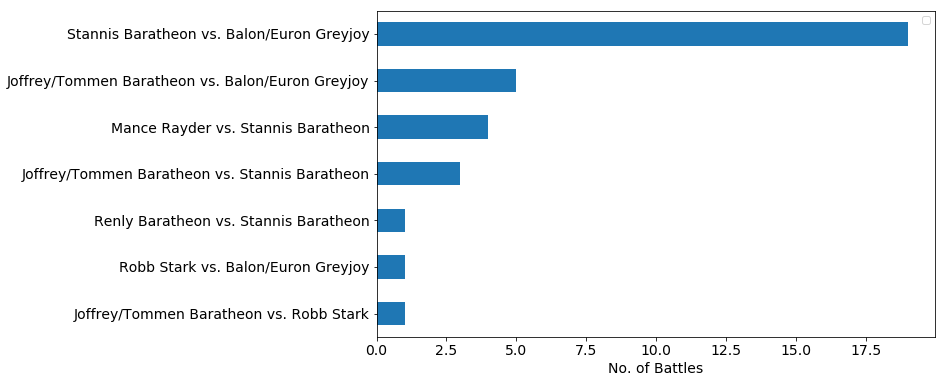

In [43]:
c = list(Counter([tuple(set(x)) for x in df.dropna(subset = ["attacker_king", "defender_king"])[["attacker_king", "defender_king"]].values if len(set(x)) > 1]).items())
p = pd.DataFrame(c).sort_values(1).plot.barh(figsize = (10, 6))
_ = p.set(yticklabels = ["%s vs. %s" % (x[0], x[1]) for x in list(zip(*c))[0]], xlabel = "No. of Battles"), p.legend("")

# 10. How does culture relate to survival?

In [44]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

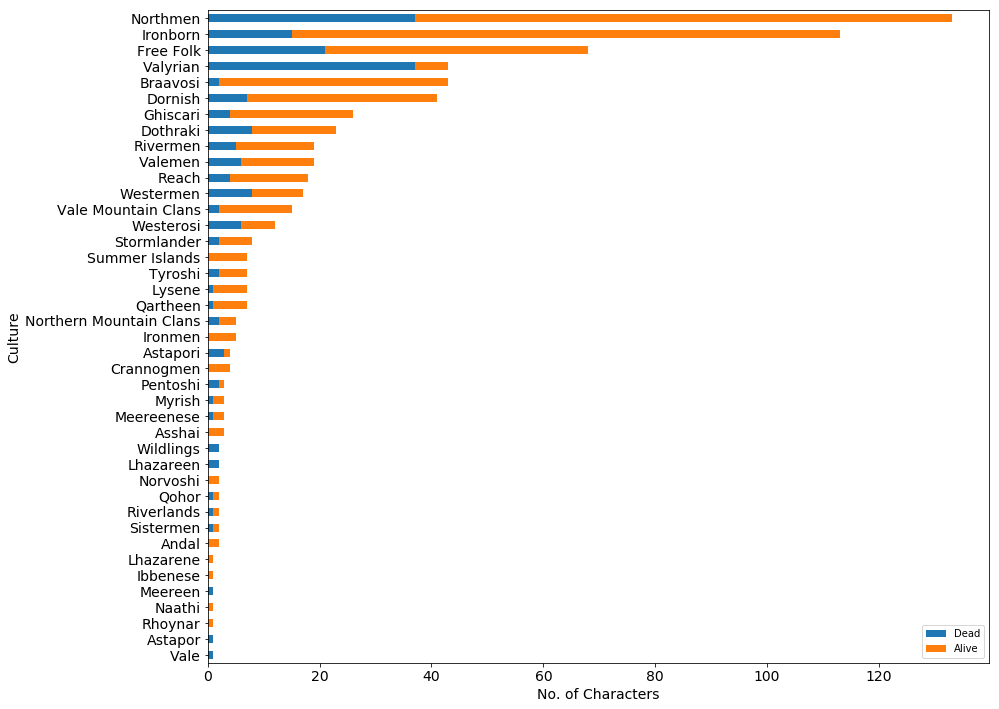

In [45]:
character_predictions.loc[:, "culture"] = [get_cult(x) for x in character_predictions.culture.fillna("")]
data = character_predictions.groupby(["culture", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
data.loc[:, "total"]= data.sum(axis = 1)
p = data[data.index != ""].sort_values("total")[[0, 1]].plot.barh(stacked = True, rot = 0, figsize = (14, 12),)
_ = p.set(xlabel = "No. of Characters", ylabel = "Culture"), p.legend(["Dead", "Alive"], loc = "lower right")

# 11. Do larger armies necessarily win?

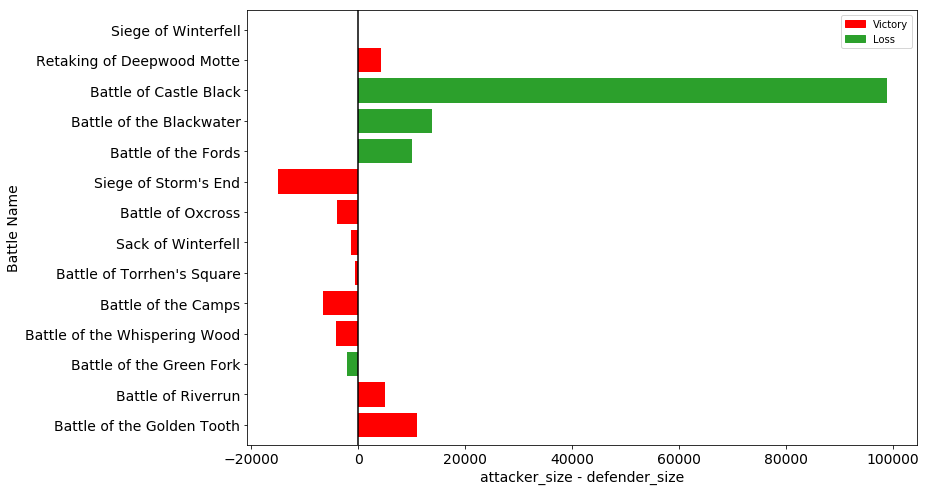

In [46]:
data = df.dropna(subset = ["attacker_size", "defender_size"]).copy(deep = True)
data = pd.concat([(data.attacker_size - data.defender_size).to_frame(), df[["attacker_outcome"]]], axis = 1, join = "inner")
data = data[data[0] != 0]
p = data[0].plot.barh(figsize = (12, 8), width = .8, color = ["Red"[0] if x == "win" else sns.color_palette()[2] if x == "loss" else "white" for x in data.attacker_outcome.values])
_ = p.legend(handles = [mpatches.Patch(color = "Red", label = "Victory", aa = True), mpatches.Patch(color = sns.color_palette()[2], label = "Loss", aa = True)])
_ = p.axvline(0, color = 'k'), p.set(yticklabels = df.name.iloc[data.index].values, xlabel = "attacker_size - defender_size", ylabel = "Battle Name")

# 12. How often did kings fight different types of battles?

In [47]:
kings = list(df.attacker_king.append(df.defender_king).fillna("Unknown").unique())
battle_types = list(df.battle_type.fillna("Unknown").str.title().unique())

def example_data():
    data = df[["battle_type", "attacker_king", "defender_king", "name"]].copy(deep = True).fillna("Unknown")
    data.loc[:, "battle_type"] = data.battle_type.fillna("Unknown").str.title()
    grouped, ret_data = data.groupby(["attacker_king", "battle_type"]).count()[["name"]], [battle_types]
    ret_data.append(("As Attacker King", [[grouped.loc[(kings[j], battle_types[i])].values[0]
                                    if (kings[j], battle_types[i]) in grouped.index else 0
                                    for i in range(len(battle_types))] for j in range(len(kings))]))
    grouped = data.groupby(["defender_king", "battle_type"]).count()[["name"]]
    ret_data.append(("As Defender King", [[grouped.loc[(kings[j], battle_types[i])].values[0]
                                    if (kings[j], battle_types[i]) in grouped.index else 0
                                    for i in range(len(battle_types))] for j in range(len(kings))]))
    return ret_data

example_data()

[['Pitched Battle', 'Ambush', 'Siege', 'Razing', 'Unknown'],
 ('As Attacker King',
  [[6, 3, 5, 0, 0],
   [3, 5, 2, 0, 0],
   [2, 2, 2, 1, 0],
   [2, 0, 2, 0, 1],
   [1, 0, 0, 1, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0]]),
 ('As Defender King',
  [[4, 5, 2, 1, 1],
   [6, 5, 3, 0, 0],
   [2, 0, 2, 0, 0],
   [0, 0, 2, 0, 0],
   [2, 0, 0, 1, 0],
   [0, 0, 1, 0, 0],
   [0, 0, 1, 0, 0]])]